In [1]:
import os
from matplotlib import pyplot as plt
from PIL import Image
import cv2
from tqdm import tqdm
import numpy as np

In [2]:
# Get all video images
path = 'Images'
imgs = os.listdir(path)
imgs.sort()
imgs

['000001.jpg',
 '000002.jpg',
 '000003.jpg',
 '000004.jpg',
 '000005.jpg',
 '000006.jpg',
 '000007.jpg',
 '000008.jpg',
 '000009.jpg',
 '000010.jpg',
 '000011.jpg',
 '000012.jpg',
 '000013.jpg',
 '000014.jpg',
 '000015.jpg',
 '000016.jpg',
 '000017.jpg',
 '000018.jpg',
 '000019.jpg',
 '000020.jpg',
 '000021.jpg',
 '000022.jpg',
 '000023.jpg',
 '000024.jpg',
 '000025.jpg',
 '000026.jpg',
 '000027.jpg',
 '000028.jpg',
 '000029.jpg',
 '000030.jpg',
 '000031.jpg',
 '000032.jpg',
 '000033.jpg',
 '000034.jpg',
 '000035.jpg',
 '000036.jpg',
 '000037.jpg',
 '000038.jpg',
 '000039.jpg',
 '000040.jpg',
 '000041.jpg',
 '000042.jpg',
 '000043.jpg',
 '000044.jpg',
 '000045.jpg',
 '000046.jpg',
 '000047.jpg',
 '000048.jpg',
 '000049.jpg',
 '000050.jpg',
 '000051.jpg',
 '000052.jpg',
 '000053.jpg',
 '000054.jpg',
 '000055.jpg',
 '000056.jpg',
 '000057.jpg',
 '000058.jpg',
 '000059.jpg',
 '000060.jpg',
 '000061.jpg',
 '000062.jpg',
 '000063.jpg',
 '000064.jpg',
 '000065.jpg',
 '000066.jpg',
 '000067.j

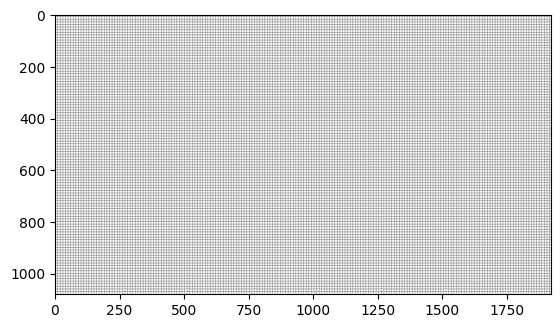

In [3]:
# Create a 1080x1920 grid image with white background, black lines and squares of 5x5 pixels
squareSize = 10
grid = np.zeros((1080, 1920, 3), dtype=np.uint8)
grid.fill(255)
for i in range(0, 1920, squareSize):
    cv2.line(grid, (i, 0), (i, 1080), (0, 0, 0), 1)
for i in range(0, 1080, squareSize):
    cv2.line(grid, (0, i), (1920, i), (0, 0, 0), 1)
# plot grid
plt.imshow(grid)
# save image with a dpi of 300
# plt.imsave('grid.png', grid, dpi=300)

In [4]:
def superimposeImage(imageName):
    img = cv2.imread(path + '/' + imageName)
    mask = cv2.imread('out/tta/' + imageName[:-4] + '.png', cv2.IMREAD_GRAYSCALE) > 0  # type: ignore
    img[mask] = grid[mask]
    return img

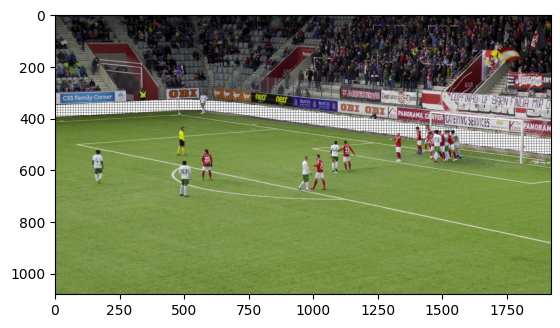

In [5]:
test = superimposeImage(imgs[0])
# change from BGR to RGB
test = cv2.cvtColor(test, cv2.COLOR_BGR2RGB)
plt.imshow(test)

In [6]:
# Get the first image
img = cv2.imread(path + '/' + imgs[0])
height, width, layers = img.shape
print(height, width, layers)

# Create a video writer
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  #type: ignore
video = cv2.VideoWriter('video.mp4', fourcc, 30, (width,height))

# Write all images to the video
for file in tqdm(imgs):
    video.write(superimposeImage(file))

# Close the video writer
cv2.destroyAllWindows()
video.release()

1080 1920 3


  0%|          | 0/750 [00:00<?, ?it/s]

100%|██████████| 750/750 [00:23<00:00, 31.99it/s]
